In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 #import OpenCV -> pip install opencv-python
import numpy as np
import glob

In [2]:
X_train = pd.read_csv('X_train_update.csv',index_col=0)
y_train = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [ ]:
# préparation mdele deep

In [4]:
#APPLY SOME TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (224, 224), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(224,224), batch_size=32, class_mode = 'categorical') ###

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


Found 293860 images belonging to 7 classes.
Found 293860 images belonging to 7 classes.


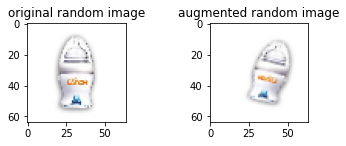

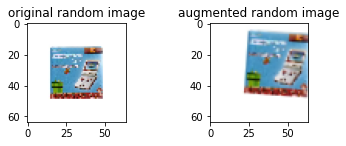

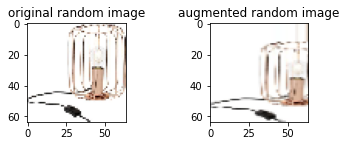

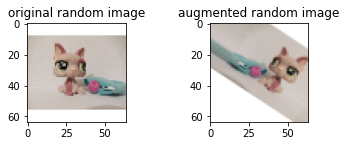

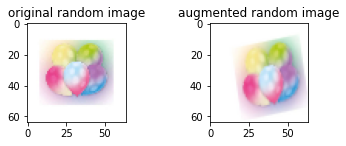

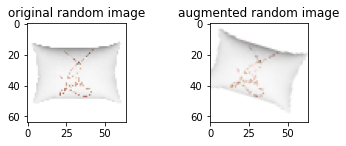

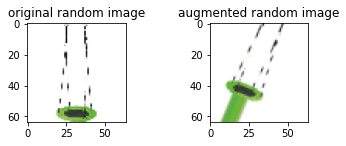

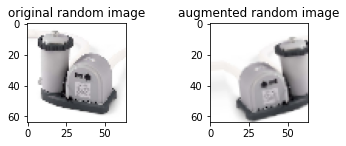

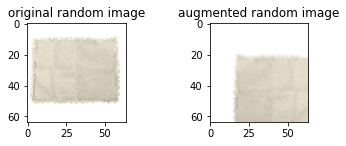

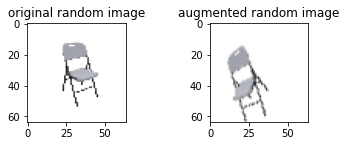

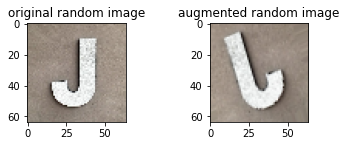

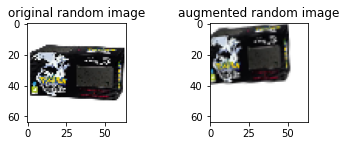

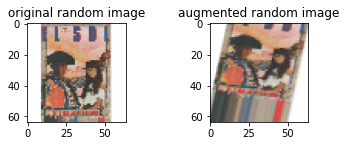

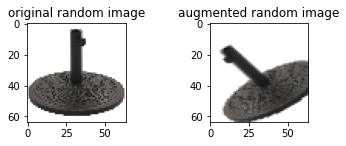

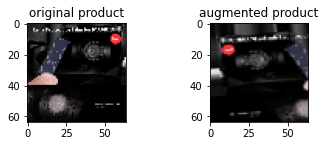

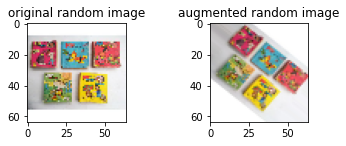

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

batches_real = test_datagen.flow_from_directory('images', target_size = (64, 64), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('images', target_size = (64, 64), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):

    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]

    title_add_on = "random image"

    if y_batch_augmented[i][1]: title_add_on =  "product"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)
    plt.show()

In [6]:
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [7]:
# Architecture du modèle 1

classifier = Sequential()

conv2d_5 = Conv2D(filters = 32,                     # Nombre de filtres
                kernel_size = (3, 3),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool2d_6 = MaxPooling2D(pool_size = (2, 2))

conv_2d_6 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128,
                activation = 'relu')

dense_6 = Dense(units = 27,
                activation = 'softmax')

classifier.add(conv2d_5)
classifier.add(max_pool2d_6)
classifier.add(conv_2d_6)
classifier.add(max_pool_2d_6)
classifier.add(flatten_3)
classifier.add(dense_5)
classifier.add(dense_6)

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3

In [14]:
import keras

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [16]:
nb_train_samples = 25000
nb_validation_samples = 2500
epochs = 2
batch_size = 100

In [14]:
history = classifier.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
250/250 [==============================] - 46s 184ms/step - loss: 3.1274 - accuracy: 0.1147 - val_loss: 3.0630 - val_accuracy: 0.1287
Epoch 2/3
250/250 [==============================] - 45s 182ms/step - loss: 3.0253 - accuracy: 0.1441 - val_loss: 3.0195 - val_accuracy: 0.1813
Epoch 3/3
250/250 [==============================] - 44s 177ms/step - loss: 2.9659 - accuracy: 0.1619 - val_loss: 3.0010 - val_accuracy: 0.1688


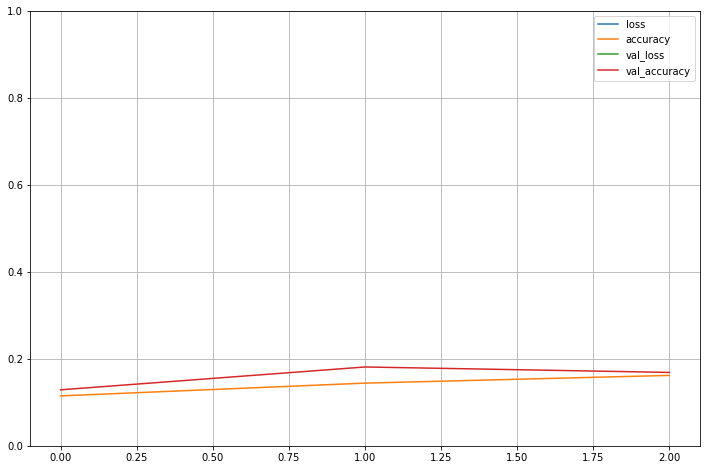

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
log_dir = '/'
tensorboard = callbacks.TensorBoard(log_dir = log_dir)
classifier.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size, callbacks = [tensorboard])

Epoch 1/2
250/250 [==============================] - 44s 178ms/step - loss: 2.9024 - accuracy: 0.1829 - val_loss: 2.8970 - val_accuracy: 0.2100
Epoch 2/2
250/250 [==============================] - 44s 178ms/step - loss: 2.8747 - accuracy: 0.1876 - val_loss: 2.9351 - val_accuracy: 0.1825


In [ ]:
# test 2

In [73]:
#APPLY SOME NEW TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (224, 224), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(224,224), batch_size=32, class_mode = 'categorical') ##

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [11]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [75]:
# Architecture du modèle 2

model2 = Sequential()

model2.add(Conv2D(input_shape=(224, 224, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Flatten())

model2.add(Dense(units=4096,activation="relu"))

model2.add(Dense(units=4096,activation="relu"))

model2.add(Dense(units=27, activation="softmax"))

In [76]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [77]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 56, 56, 256)      

In [79]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 3
batch_size = 100

In [80]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [81]:
history2 = model2.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size, callbacks=[checkpoint,early])

Epoch 1/3
760/760 [==============================] - 6762s 9s/step - loss: 3.1266 - accuracy: 0.1192 - val_loss: 3.0846 - val_accuracy: 0.1217
Epoch 2/3
153/760 [=====>........................] - ETA: 2:13:23 - loss: 3.0989 - accuracy: 0.1154

KeyboardInterrupt: 

In [15]:
#APPLY SOME NEW TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (96, 96), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(96,96), batch_size=32, class_mode = 'categorical') #

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [25]:
# Architecture du modèle 3

classifier3 = Sequential()

conv2d_4 = Conv2D(filters = 64,                     
                kernel_size = (3, 3),            
                padding = 'valid',               
                input_shape = (96, 96, 3),      
                activation = 'relu')             

max_pool2d_4 = MaxPooling2D(pool_size = (2, 2))

conv2d_5 = Conv2D(filters = 32,                     
                kernel_size = (3, 3),            
                padding = 'valid',               
                input_shape = (64, 64, 3),       
                activation = 'relu')             

max_pool2d_5 = MaxPooling2D(pool_size = (2, 2))

conv_2d_6 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128,
                activation = 'relu')

dense_6 = Dense(units = 27,
                activation = 'softmax')

classifier3.add(conv2d_4)
classifier3.add(max_pool2d_4)
classifier3.add(conv2d_5)
classifier3.add(max_pool2d_5)
classifier3.add(conv_2d_6)
classifier3.add(max_pool_2d_6)
classifier3.add(flatten_3)
classifier3.add(dense_5)
classifier3.add(dense_6)

In [26]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier3.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [30]:
nb_train_samples = 25000
nb_validation_samples = 2500
epochs = 10
batch_size = 100

In [31]:
history3 = classifier3.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
250/250 [==============================] - 67s 267ms/step - loss: 2.7063 - accuracy: 0.2307 - val_loss: 2.9138 - val_accuracy: 0.1737
Epoch 2/10
250/250 [==============================] - 64s 256ms/step - loss: 2.6973 - accuracy: 0.2348 - val_loss: 2.8453 - val_accuracy: 0.1925
Epoch 3/10
250/250 [==============================] - 65s 259ms/step - loss: 2.6876 - accuracy: 0.2405 - val_loss: 2.8475 - val_accuracy: 0.1900
Epoch 4/10
250/250 [==============================] - 63s 253ms/step - loss: 2.6655 - accuracy: 0.2488 - val_loss: 2.8070 - val_accuracy: 0.2163
Epoch 5/10
250/250 [==============================] - 64s 255ms/step - loss: 2.6641 - accuracy: 0.2399 - val_loss: 2.8621 - val_accuracy: 0.1825
Epoch 6/10
250/250 [==============================] - 63s 252ms/step - loss: 2.6470 - accuracy: 0.2476 - val_loss: 2.8275 - val_accuracy: 0.1713
Epoch 7/10
250/250 [==============================] - 64s 258ms/step - loss: 2.6524 - accuracy: 0.2470 - val_loss: 2.8326 - val_ac

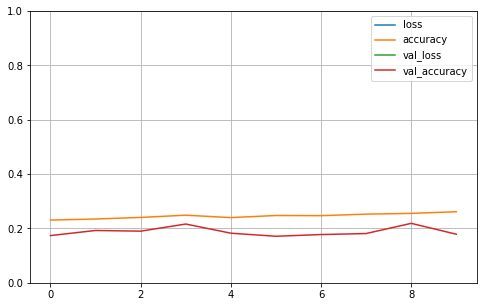

In [33]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
####################################################################
https://keras.io/api/applications/

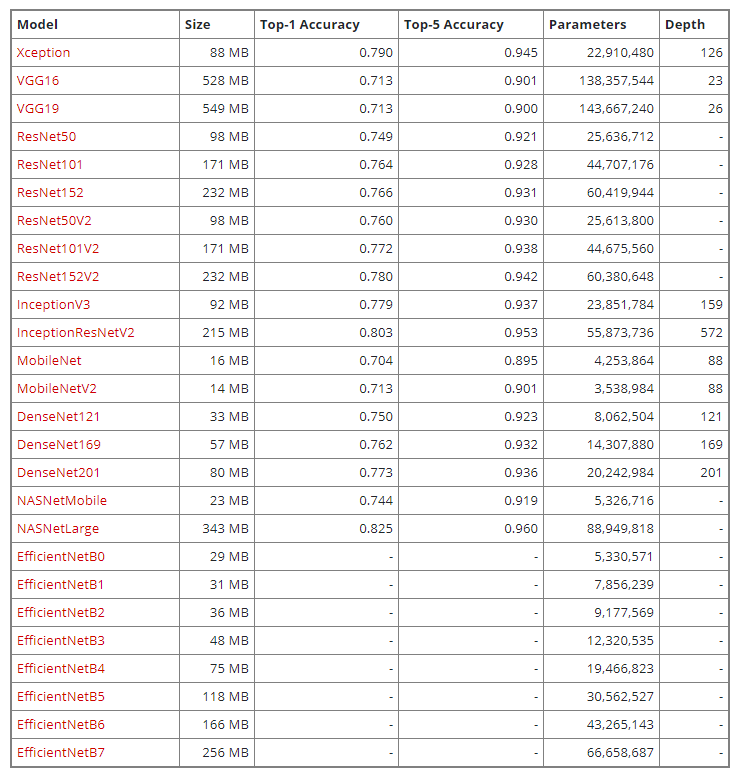

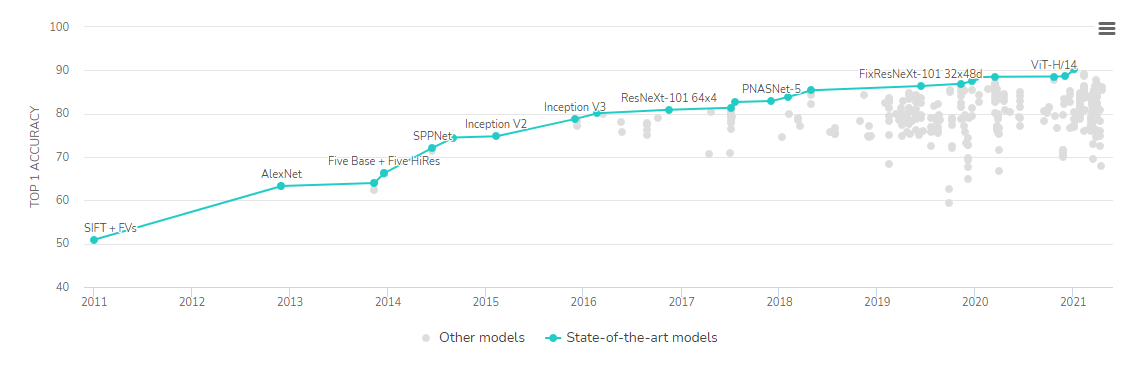


In [8]:
from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input, rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (224, 224), #####
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(224,224), batch_size=32, class_mode = 'categorical') #

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [9]:
from keras.applications.vgg16 import VGG16

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

modelvgg = Sequential()
modelvgg.add(base_model) # Ajout du modèle VGG16
modelvgg.add(GlobalAveragePooling2D()) 
modelvgg.add(Dense(1024,activation='relu'))
modelvgg.add(Dropout(rate=0.2)) ####
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dropout(rate=0.2))  ####
modelvgg.add(Dense(units=27, activation='softmax'))

modelvgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [12]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
modelvgg.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [91]:
modelvgg.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 27)              

In [13]:
nb_train_samples = 7600
nb_validation_samples = 840
epochs = 5
batch_size = 50

In [14]:
history4 = modelvgg.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
152/152 [==============================] - 277s 2s/step - loss: 3.0415 - accuracy: 0.1310 - val_loss: 2.8851 - val_accuracy: 0.2129
Epoch 2/5
152/152 [==============================] - 323s 2s/step - loss: 2.7802 - accuracy: 0.2097 - val_loss: 2.7069 - val_accuracy: 0.2559
Epoch 3/5
152/152 [==============================] - 327s 2s/step - loss: 2.5949 - accuracy: 0.2580 - val_loss: 2.5437 - val_accuracy: 0.2578
Epoch 4/5
152/152 [==============================] - 326s 2s/step - loss: 2.4514 - accuracy: 0.2969 - val_loss: 2.4314 - val_accuracy: 0.2656
Epoch 5/5
152/152 [==============================] - 331s 2s/step - loss: 2.3970 - accuracy: 0.3111 - val_loss: 2.3999 - val_accuracy: 0.3125


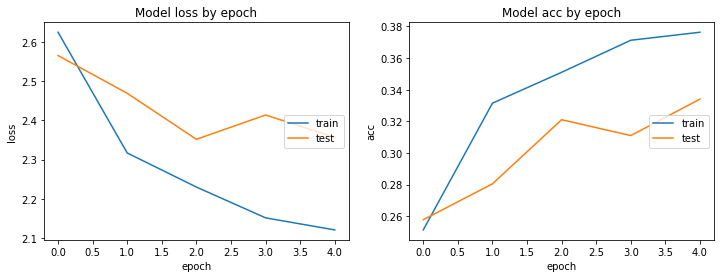

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [96]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [97]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
modelvgg.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [98]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 10
batch_size = 100

In [99]:
history5 = modelvgg.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
760/760 [==============================] - 457s 602ms/step - loss: 2.0872 - accuracy: 0.3880 - val_loss: 2.2571 - val_accuracy: 0.3683
Epoch 2/10
760/760 [==============================] - 468s 616ms/step - loss: 1.9184 - accuracy: 0.4317 - val_loss: 2.1738 - val_accuracy: 0.3962
Epoch 3/10
760/760 [==============================] - 468s 616ms/step - loss: 1.8485 - accuracy: 0.4554 - val_loss: 2.1786 - val_accuracy: 0.3676
Epoch 4/10
760/760 [==============================] - 470s 618ms/step - loss: 1.7736 - accuracy: 0.4710 - val_loss: 2.0434 - val_accuracy: 0.4025
Epoch 5/10
760/760 [==============================] - 469s 617ms/step - loss: 1.7390 - accuracy: 0.4838 - val_loss: 2.0554 - val_accuracy: 0.4070
Epoch 6/10
760/760 [==============================] - 469s 617ms/step - loss: 1.6631 - accuracy: 0.5063 - val_loss: 2.1009 - val_accuracy: 0.3996
Epoch 7/10
760/760 [==============================] - 469s 617ms/step - loss: 1.6418 - accuracy: 0.5092 - val_loss: 1.9928 -

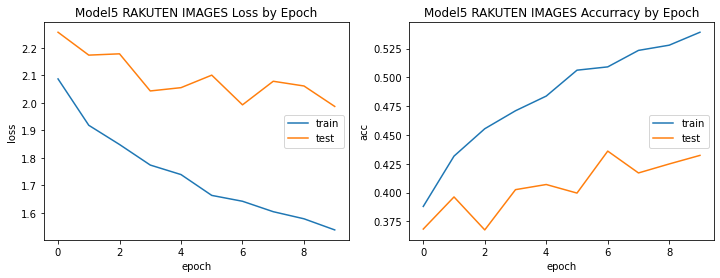

In [103]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model5 RAKUTEN IMAGES Loss by Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model5 RAKUTEN IMAGES Accurracy by Epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test','val'], loc='right')
plt.show()

In [ ]:
#### RESNET TRIAL
https://machinelearningknowledge.ai/keras-implementation-of-resnet-50-architecture-from-scratch/
    
https://keras.io/api/applications/resnet/

In [71]:
import tensorflow as tf

tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    )

102973440/102967424 [==============================] - 9s 0us/step
